<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>


# Laboratorio de Feature Scaling

Continuando con nuestro proyecto en AutoRenew, la empresa de coches de segunda mano, en este laboratorio abordarás una fase crucial del preprocesamiento de datos: el **Feature Scaling**. Este paso es esencial para asegurar que todas las características (variables) de los coches se encuentren en la misma escala antes de entrenar los modelos de Machine Learning. Esto evitará que algunas características dominen sobre otras debido a sus rangos de valores diferentes, mejorando así la precisión del modelo predictivo que estás desarrollando.

Tu tarea en este laboratorio es aplicar técnicas de Feature Scaling a las características del conjunto de datos que consideres relevantes. Este paso es fundamental para preparar los datos de manera adecuada para el entrenamiento de modelos de Machine Learning, lo que haremos en los próximos ejercicios.

**Columnas del conjunto de datos que podrías escalar:**

- **price**: Precio del coche.

- **powerCV**: Potencia del coche en caballos de vapor (CV).

- **kilometer**: Kilometraje total del coche.

- **yearOfRegistration**: Año de registro del coche (aunque es una característica temporal, en algunos casos puede necesitar escalado dependiendo del enfoque del modelo).

- **monthOfRegistration**: Mes de registro del coche.

**Instrucciones:**

1. **Identificación de las características a escalar:** Revisa el conjunto de datos y selecciona las columnas que deberían ser escaladas. Estas generalmente incluyen características numéricas continuas como el precio, la potencia y el kilometraje.

2. **Aplicación de técnicas de Feature Scaling**


3. **Comparación de resultados:** Después de aplicar el escalado, observa cómo han cambiado las distribuciones de las características. Evalúa cuál de las técnicas de escalado es más apropiada para este conjunto de datos y justifica tu elección.

**Nota:** Este laboratorio se construye sobre el análisis exploratorio y la gestión de nulos que realizaste anteriormente. Asegúrate de mantener una buena documentación de tus procesos, ya que utilizaremos estos datos escalados en las próximas etapas de modelado de Machine Learning.


In [1]:
# Para gestionar el feature scaling
# -----------------------------------------------------------------------
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler, RobustScaler

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
# Tratamiento de datos
# -----------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../../datos/02_Modelo2/02_autorenew_sin_nulos.csv",index_col=0)
df.head()

,seller,offerType,brand,vehicleType,fuelType,gearbox,notRepairedDamage,kilometer,powerCV,price,yearOfRegistration
0,private,offer,volkswagen,other,petrol,manually,unknown,150000,81.700794,480.0,The 90's
1,private,offer,audi,coupe,diesel,manually,yes,125000,187.000000,18300.0,The 2010
2,private,offer,jeep,suv,diesel,automatic,unknown,125000,161.000000,9800.0,The 2000
3,private,offer,volkswagen,small car,petrol,manually,no,150000,74.000000,1500.0,The 2000
4,private,offer,skoda,small car,diesel,manually,no,90000,68.000000,3600.0,The 2000


# Cuales Escalar
- **price**: Precio del coche.
    - Sobre todo, los valores están muy segregados, en notación científica
- **powerCV**: Potencia del coche en caballos de vapor (CV).
    - Tenemos gran variedad y están segregados


<Axes: xlabel='powerCV', ylabel='Count'>

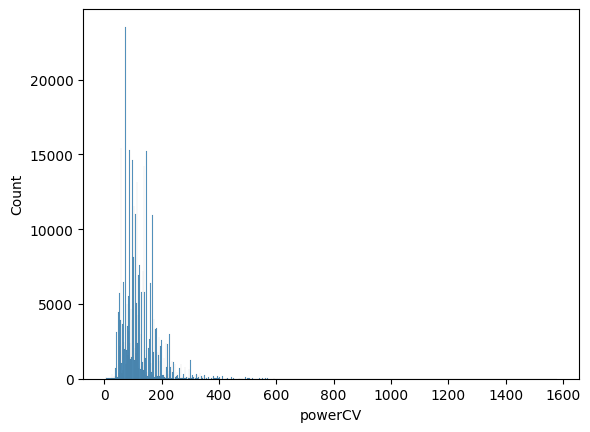

In [3]:
sns.histplot(x="powerCV",data=df)

<Axes: xlabel='price', ylabel='Count'>

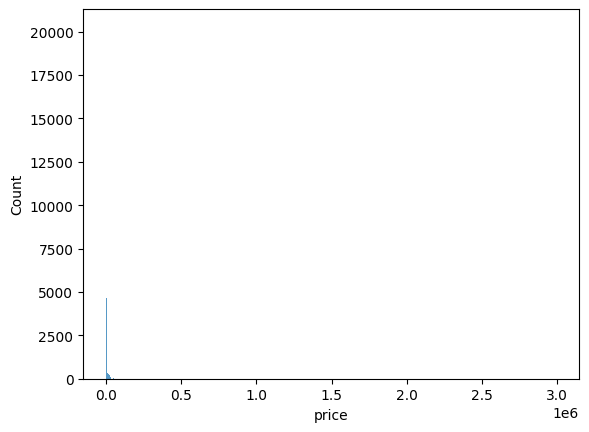

In [4]:
sns.histplot(x="price", data = df)

# Aplicamos Feature Scaling... Pero ¿Cual?
Tenemos los Siguientes pero antes:

### ¿Qué importancia tienen los outliers?
- **RobustScaler:** Es el mas "amigable" con los outliers,genera un rango de 0 a X (depende de cuantos datos tengamos) donde aún manteniendo la distribución los tenemos más juntos, si queremos darles mucho peso es nuestra mejor opción

- **StandardScaler:** También es amigable con los outliers, pero genera un rango de 0 a X mucho menos que el anterior, mantiene la distribución, si queremos darles algo de peso a los outliers, este es definitivamente nuestro amigo.

- **MinMaxScaler:** Genera un rango de 0 a 1 donde mantiene la distribución original pero está todo mucho más comprimido, aquí los outliers no se van a poder apreciar, así que si no te interesan y tus datos no están normalizados... es tu opción

- **Normalizer:** Tus datos están normalizados y no te interesan los outliers?, Está es tu opción, Genera un Rango de -1 a 1 en donde mantiene la distribución (como el resto). Es solo para datos normalizados, algo que veremos poco por aquí... 




### Resumiendo, ¿Cuál elijo?

Necesito los outliers, voy a realizar RobustScaler y StandardScaler y a compararlos para ver cual me conviene más

In [5]:
escalador_robust = RobustScaler()
datos_transf_robust = escalador_robust.fit_transform(df[["price", "powerCV"]])
df[["price_robust_scaler", "powerCV_robust_scaler"]] = datos_transf_robust

escalador_stand = StandardScaler()
datos_transf_stand = escalador_stand.fit_transform(df[["price", "powerCV"]])
df[["price_standard_scaler", "powerCV_standard_scaler"]] = datos_transf_stand

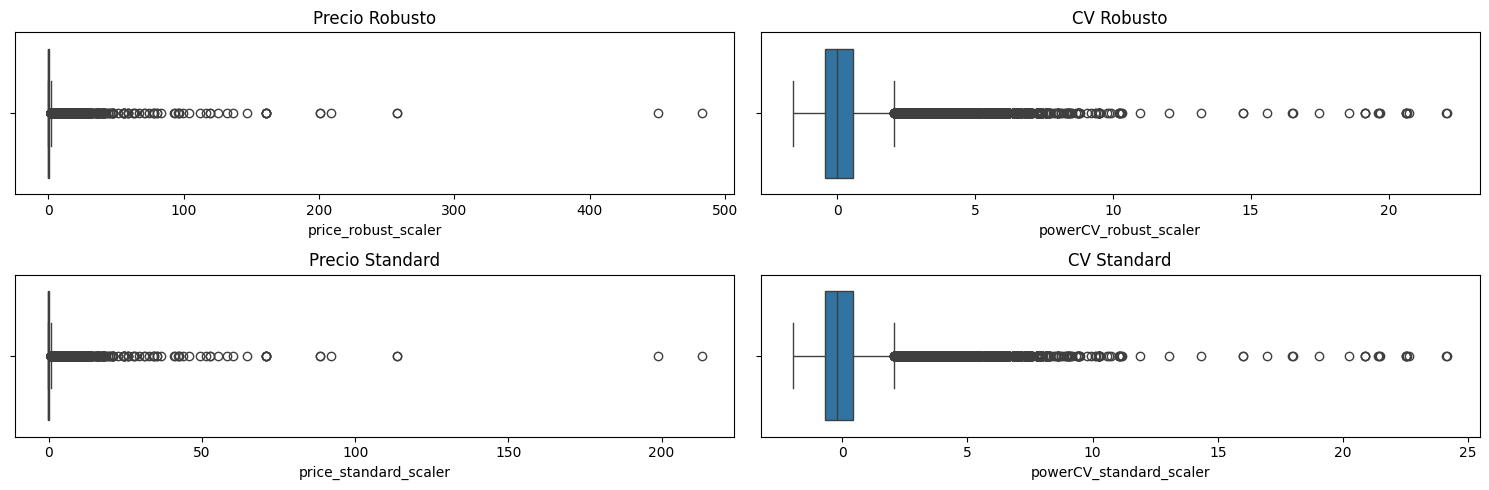

In [6]:
fig , axes = plt.subplots(nrows=2 , ncols=2, figsize = (15, 5))
sns.boxplot(x = "price_robust_scaler", data = df, ax = axes[0][0])
axes[0][0].set_title("Precio Robusto")
sns.boxplot(x = "powerCV_robust_scaler", data = df, ax = axes[0][1])
axes[0][1].set_title("CV Robusto")

sns.boxplot(x = "price_standard_scaler", data = df, ax = axes[1][0])
axes[1][0].set_title("Precio Standard")
sns.boxplot(x = "powerCV_standard_scaler", data = df, ax = axes[1][1])
axes[1][1].set_title("CV Standard")
plt.tight_layout()

Como podemos ver, ambas tienen la misma distribución

### ¿Con cuál me quedo?
Me quedo con el RobustScaler, considero bastante importante que nuestros datos y outliers tengan el peso que tienen aquí,
Teniendo en cuenta que nuestro análisis se centra en el precio que tendrán los coches en los próximos años, debemos estudiar los valores.
Teniendo en cuenta que el precio y la potencia son valores que me quedo, necesito sus outliers para poder calcular con la máxima precisión

In [7]:
df.drop(columns=["price_standard_scaler","powerCV_standard_scaler"],inplace=True)
df

,seller,offerType,brand,vehicleType,fuelType,gearbox,notRepairedDamage,kilometer,powerCV,price,yearOfRegistration,price_robust_scaler,powerCV_robust_scaler
0,private,offer,volkswagen,other,petrol,manually,unknown,150000,81.700794,480.0,The 90's,-0.430645,-0.441924
1,private,offer,audi,coupe,diesel,manually,yes,125000,187.000000,18300.0,The 2010,2.443548,1.146318
2,private,offer,jeep,suv,diesel,automatic,unknown,125000,161.000000,9800.0,The 2000,1.072581,0.754157
3,private,offer,volkswagen,small car,petrol,manually,no,150000,74.000000,1500.0,The 2000,-0.266129,-0.558076
4,private,offer,skoda,small car,diesel,manually,no,90000,68.000000,3600.0,The 2000,0.072581,-0.648575
...,...,...,...,...,...,...,...,...,...,...,...,...,...
356514,private,offer,sonstige_autos,other,other,unknown,unknown,20000,108.197668,2200.0,The 2000,-0.153226,-0.042268
356515,private,offer,smart,convertible,petrol,automatic,no,125000,100.000000,1199.0,The 2000,-0.314677,-0.165915
356516,private,offer,volkswagen,bus,diesel,manually,no,150000,101.000000,9200.0,The 90's,0.975806,-0.150831
356517,private,offer,volkswagen,combi,diesel,manually,unknown,150000,99.000000,3400.0,The 2000,0.040323,-0.180998


In [8]:
df.to_csv("../../datos/02_Modelo2/03_autorenew_feature_scaling.csv")